# Comparison plot of the various indicators, by response or property type

Here the objective is to sea if uncertainty voxets or dissimilarity measures follow similar trends

 1. compare Cardinality to Entropy - uncertainty voxets (local measures)
     - for discrete property fieled, we can note a strong correlation
     - for continuous property fields, the standard deviation (instead of cardinality) might be dominated by extreme values in the ensemble, while the continuous entropy will refelect more the variety of patterns.
 2. compare dissimilarity measures (global measures) based on
     - *his*: histogram 
     - *2ps*: two-point statistics (semi-variogram)
     - *mph*: multiple-point histogram
     - *cty*: connectivity
     - *wvt*: wavelet

In [1]:
# import modules
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime
import pickle
from sklearn import manifold
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# init parameters
myseed = 65432
pfn_histo = "./pickledata/testing-model-subset-histogram.pickle"
pfn_mph = "./pickledata/testing-model-subset-mph.pickle"
pfn_semivario = "./pickledata/testing-model-subset-semivariogram.pickle"
pfn_connectivity = "./pickledata/testing-model-subset-connectivity.pickle"
pfn_wavelet = "./pickledata/testing-model-subset-wavelet.pickle"
pfn_entropy = "./pickledata/testing-model-subset-entropy.pickle"
pfn_cardinality = "./pickledata/testing-model-subset-cardinality.pickle"

# load computed measures
with open(pfn_histo, 'rb') as f:
    [dist_hist_mag,dist_hist_grv,dist_hist_mod,dist_hist_rho,dist_hist_sus,
                 mdspos_mag,mdspos_grv,mdspos_mod,mdspos_rho,mdspos_sus] = pickle.load(f)

with open(pfn_mph, 'rb') as f:
    [dist_mph_mag,dist_mph_grv,dist_mph_mod,dist_mph_rho,dist_mph_sus,
                  mdspos_mag,mdspos_grv,mdspos_mod,mdspos_rho,mdspos_sus] = pickle.load(f)

with open(pfn_semivario, 'rb') as f:
    [dist_2ps_mag,dist_2ps_grv,dist_2ps_mod,dist_2ps_rho,dist_2ps_sus,
                  mdspos_mag,mdspos_grv,mdspos_mod,mdspos_rho,mdspos_sus] = pickle.load(f)

with open(pfn_connectivity, 'rb') as f:
    [dist_cty_mag,dist_cty_grv,dist_cty_mod,dist_cty_rho,dist_cty_sus,
                  mdspos_mag,mdspos_grv,mdspos_mod,mdspos_rho,mdspos_sus] = pickle.load(f)

with open(pfn_wavelet, 'rb') as f:
    [dist_wvt_mag,dist_wvt_grv,dist_wvt_mod,dist_wvt_rho,dist_wvt_sus,
                  mdspos_mag,mdspos_grv,mdspos_mod,mdspos_rho,mdspos_sus] = pickle.load(f)

with open(pfn_entropy, 'rb') as f:
    [ent_grv,ent_mag,ent,ent_rho,ent_sus] = pickle.load(f)

with open(pfn_cardinality, 'rb') as f:
    [grv_rngstd,mag_rngstd,grv_rng,mag_rng,grv_std,mag_std,crd,rho_rngstd,sus_rngstd,rho_rng,sus_rng,rho_std,sus_std] = pickle.load(f)



## Define plotting functions

In [2]:
def plot_comparison_dissimilarities(dist_hist,dist_2ps,dist_mph,dist_wvt,dist_cty,title_spec):
    nsamples = dist_hist.shape[0]
    
    mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=myseed,
                        dissimilarity="precomputed", n_jobs=1)
    mdspos_his = mds.fit(dist_hist).embedding_
    mdspos_mph = mds.fit(dist_mph).embedding_
    mdspos_2ps = mds.fit(dist_2ps).embedding_
    mdspos_cty = mds.fit(dist_cty).embedding_
    mdspos_wvt = mds.fit(dist_wvt).embedding_
    
    # MDS plot
    plt.figure()
    ax = plt.axes([0., 0., 1., 1.])
    s = 100
    plt.scatter(mdspos_his[:, 0], mdspos_his[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='his', marker='o')
    plt.scatter(mdspos_2ps[:, 0], mdspos_2ps[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='2ps', marker='v')
    plt.scatter(mdspos_mph[:, 0], mdspos_mph[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='mph', marker='^')
    plt.scatter(mdspos_cty[:, 0], mdspos_cty[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='cty', marker='<')
    plt.scatter(mdspos_wvt[:, 0], mdspos_wvt[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='wvt', marker='>')
    plt.legend(scatterpoints=1, loc='best', shadow=False)
    ax.set_title('2D Multi-Dimensional Scaling Representation of '+ title_spec +' (dis-)similarities')
    plt.show()
    
    # SNS plot
    ix=np.tril_indices(nsamples,k=-1)
    df= pd.DataFrame({'his':dist_hist[ix], '2ps':dist_2ps[ix], 'mph':dist_mph[ix], 'cty':dist_cty[ix], 'wvt':dist_wvt[ix]})
    g = sns.PairGrid(df)
    g.map_upper(sns.scatterplot)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=3, legend=False)
    return

def plot_2D_uncertainty_voxets(cardinality,entropy,lgd_card,lgd_ent,title_spec):
    cmin = np.amin(cardinality)
    cmax = np.amax(cardinality)
    emin = np.amin(entropy)
    emax = np.amax(entropy)
    nrm01_card = (cardinality.flatten()-cmin)/(cmax-cmin)
    nrm01_ent = (entropy.flatten()-emin)/(emax-emin)
    fig = plt.figure()
    gs = fig.add_gridspec(1,8)
    ax0 = fig.add_subplot(gs[0, 0:2])
    ax0leg = fig.add_subplot(gs[0, 2])
    ax1 = fig.add_subplot(gs[0, 3:5])
    ax1leg = fig.add_subplot(gs[0, 5])
    ax2 = fig.add_subplot(gs[0, 6:])
    pos0=ax0.imshow(cardinality)
    ax0.axis('off'),ax0.set_title(lgd_card),ax0leg.axis('off')
    axins0 = inset_axes(ax0leg,
                       width="10%",  # width = 5% of parent_bbox width
                       height="90%",  # height : 50%
                       loc='center left'
                       )
    fig.colorbar(pos0,cax=axins0,ticks=[]) 
    ax1.imshow(entropy)
    ax1.axis('off'),ax1.set_title(lgd_ent),ax1leg.axis('off')
    ax2.scatter(nrm01_card,nrm01_ent,c='blue',marker='+')
    ax2.set_xlabel('norm. cardinality'),ax2.set_ylabel('norm. entropy')
    ax2.set_title(title_spec)
    fig.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.35, wspace=0.3, hspace=0.5)
    plt.show()
    return
def plot_3D_uncertainty_voxets(cardinality,entropy,lgd_card,lgd_ent,title_spec):
    cmin = np.amin(cardinality)
    cmax = np.amax(cardinality)
    emin = np.amin(entropy)
    emax = np.amax(entropy)
    nrm01_card = (cardinality.flatten()-cmin)/(cmax-cmin)
    nrm01_ent = (entropy.flatten()-emin)/(emax-emin)
    fig = plt.figure()
    gs = fig.add_gridspec(2,12)
    ax00leg = fig.add_subplot(gs[0, 0])
    ax01 = fig.add_subplot(gs[0, 1:3])
    ax02 = fig.add_subplot(gs[0, 3:5])
    ax03 = fig.add_subplot(gs[0, 5:7])
    ax10leg = fig.add_subplot(gs[1, 0])
    ax11 = fig.add_subplot(gs[1, 1:3])
    ax12 = fig.add_subplot(gs[1, 3:5])
    ax13 = fig.add_subplot(gs[1, 5:7])
    ax4 = fig.add_subplot(gs[:, 8:])
    ax01.axis('off'),ax02.axis('off'),ax03.axis('off')
    ax11.axis('off'),ax12.axis('off'),ax13.axis('off')
    ax01.set_title('Map'), ax02.set_title('W (N) E'), ax03.set_title('N (W) S')
    ax11.set_title('Map'), ax12.set_title('W (N) E'), ax13.set_title('N (W) S')
    pos01=ax01.imshow(cardinality[0,:,:],vmin=cmin,vmax=cmax)
    ax02.imshow(cardinality[:,0,:],vmin=cmin,vmax=cmax)
    ax03.imshow(cardinality[:,:,0],vmin=cmin,vmax=cmax)
    ax00leg.axis('off') #,ax00leg.set_title(lgd_card)
    axins00 = inset_axes(ax00leg,
                       width="10%",  # width = 5% of parent_bbox width
                       height="90%",  # height : 50%
                       loc='center left'
                       )
    fig.colorbar(pos01,cax=axins00,label=lgd_card) 
    pos11=ax11.imshow(entropy[0,:,:],vmin=emin,vmax=emax)
    ax12.imshow(entropy[:,0,:],vmin=emin,vmax=emax)
    ax13.imshow(entropy[:,:,0],vmin=emin,vmax=emax)
    ax10leg.axis('off') #,ax10leg.set_title(lgd_ent)
    axins10 = inset_axes(ax10leg,
                       width="10%",  # width = 5% of parent_bbox width
                       height="90%",  # height : 50%
                       loc='center left'
                       )
    fig.colorbar(pos11,cax=axins10,label=lgd_ent) 
    ax4.scatter(nrm01_card,nrm01_ent,c='blue',marker='+')
    ax4.set_xlabel('norm. cardinality'),ax4.set_ylabel('norm. entropy')
    ax4.set_title(title_spec)
    fig.subplots_adjust(left=0.0, bottom=0.0, right=1.15, top=0.55, wspace=0.1, hspace=0.25)
    plt.show()
    return

def plot_uncertainty_voxets(cardinality,entropy,lgd_card,lgd_ent,title_spec):
    dim = len(entropy.shape)
    if dim ==2:
        plot_2D_uncertainty_voxets(cardinality,entropy,lgd_card,lgd_ent,title_spec)
    elif dim==3:
        plot_3D_uncertainty_voxets(cardinality,entropy,lgd_card,lgd_ent,title_spec)
    else:
        print("NA for dimensions>3 or dimensions<2")
    return

# Magnetic response plots

15-Jun-2021 (11:49:45) - MAGNETIC DISSIMILARITY COMPARISON START


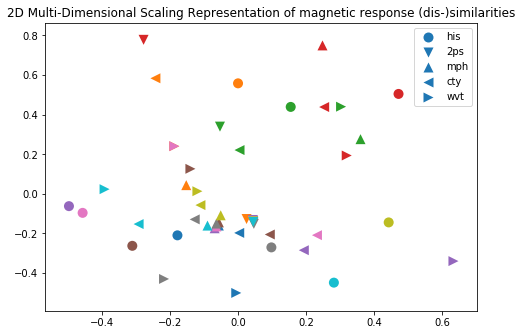

15-Jun-2021 (11:49:49) - MAGNETIC DISSIMILARITY COMPARISON END
15-Jun-2021 (11:49:49) - MAGNETIC UNCERTAINTY VOXETS COMPARISON START


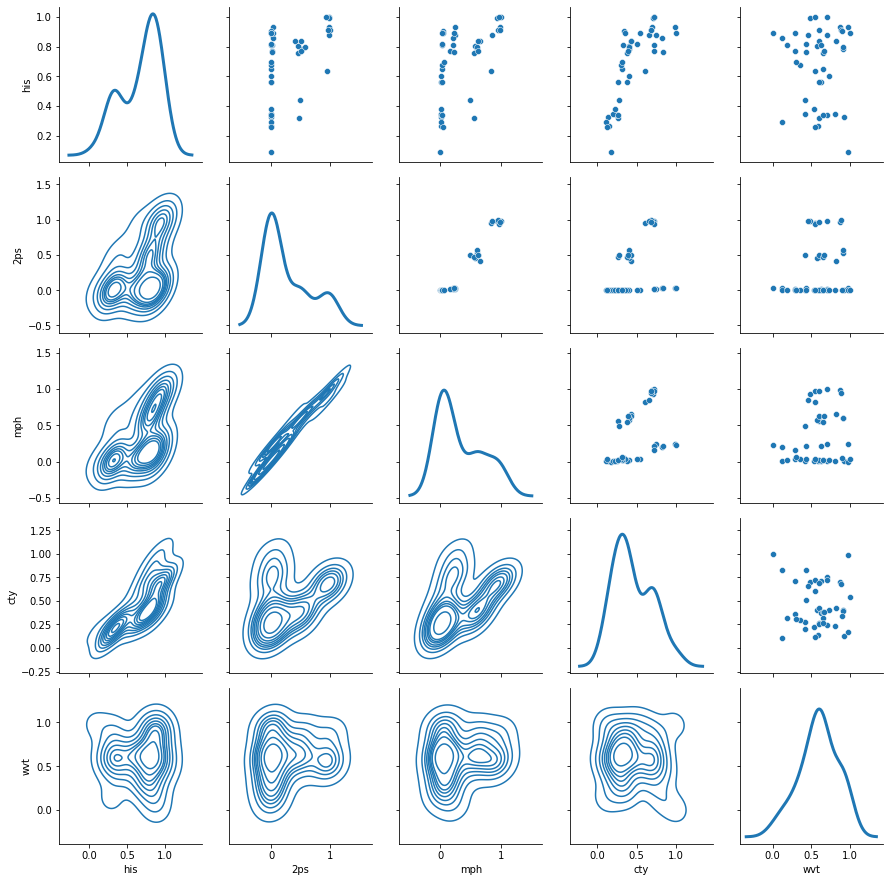

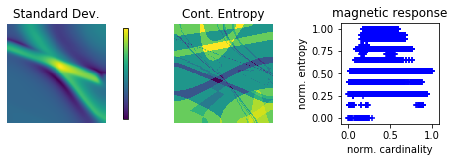

15-Jun-2021 (11:49:52) - MAGNETIC UNCERTAINTY VOXETS COMPARISON END


In [3]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"MAGNETIC DISSIMILARITY COMPARISON START")
# divide by maximum distance for normalization between [0-1]
dist_hist = dist_hist_mag/np.amax(dist_hist_mag)
dist_mph = dist_mph_mag/np.amax(dist_mph_mag)
dist_2ps = dist_2ps_mag/np.amax(dist_2ps_mag)
dist_cty = dist_cty_mag/np.amax(dist_cty_mag)
dist_wvt = dist_wvt_mag/np.amax(dist_wvt_mag)
title_spec = 'magnetic response'
plot_comparison_dissimilarities(dist_hist,dist_2ps,dist_mph,dist_cty,dist_wvt,title_spec)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"MAGNETIC DISSIMILARITY COMPARISON END")

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"MAGNETIC UNCERTAINTY VOXETS COMPARISON START")
entropy = ent_mag
lgd_ent = 'Cont. Entropy'
cardinality = mag_std
lgd_card = 'Standard Dev.'
plot_uncertainty_voxets(cardinality,entropy,lgd_card,lgd_ent,title_spec)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"MAGNETIC UNCERTAINTY VOXETS COMPARISON END")

# Gravity response plots

15-Jun-2021 (11:49:52) - GRAVITY DISSIMILARITY COMPARISON START


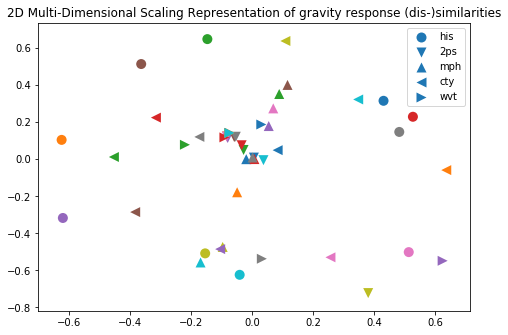

15-Jun-2021 (11:49:55) - GRAVITY DISSIMILARITY COMPARISON END
15-Jun-2021 (11:49:55) - GRAVITY UNCERTAINTY VOXETS COMPARISON START


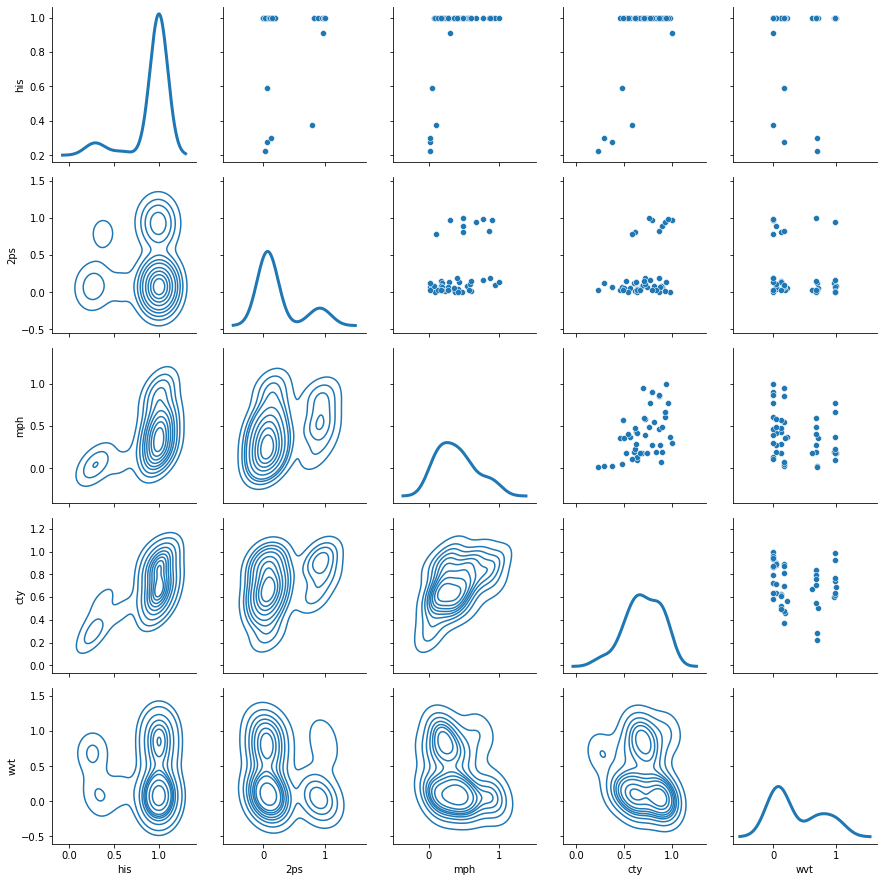

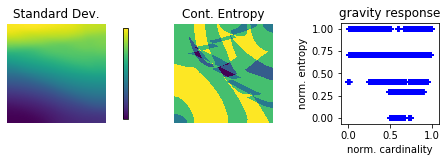

15-Jun-2021 (11:49:59) - GRAVITY UNCERTAINTY VOXETS COMPARISON END


In [4]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"GRAVITY DISSIMILARITY COMPARISON START")
# divide by maximum distance for normalization between [0-1]
dist_hist = dist_hist_grv/np.amax(dist_hist_grv)
dist_mph = dist_mph_grv/np.amax(dist_mph_grv)
dist_2ps = dist_2ps_grv/np.amax(dist_2ps_grv)
dist_cty = dist_cty_grv/np.amax(dist_cty_grv)
dist_wvt = dist_wvt_grv/np.amax(dist_wvt_grv)
title_spec = 'gravity response'
plot_comparison_dissimilarities(dist_hist,dist_2ps,dist_mph,dist_cty,dist_wvt,title_spec)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"GRAVITY DISSIMILARITY COMPARISON END")

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"GRAVITY UNCERTAINTY VOXETS COMPARISON START")
entropy = ent_grv
lgd_ent = 'Cont. Entropy'
cardinality = grv_std
lgd_card = 'Standard Dev.'
plot_uncertainty_voxets(cardinality,entropy,lgd_card,lgd_ent,title_spec)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"GRAVITY UNCERTAINTY VOXETS COMPARISON END")

# Lithocode plots

15-Jun-2021 (11:49:59) - LITHOCODE DISSIMILARITY COMPARISON START


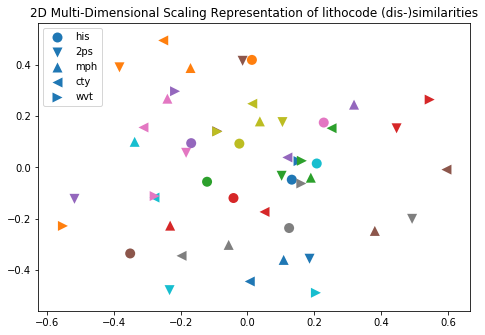

15-Jun-2021 (11:50:02) - LITHOCODE DISSIMILARITY COMPARISON END
15-Jun-2021 (11:50:02) - LITHOCODE UNCERTAINTY VOXETS COMPARISON START


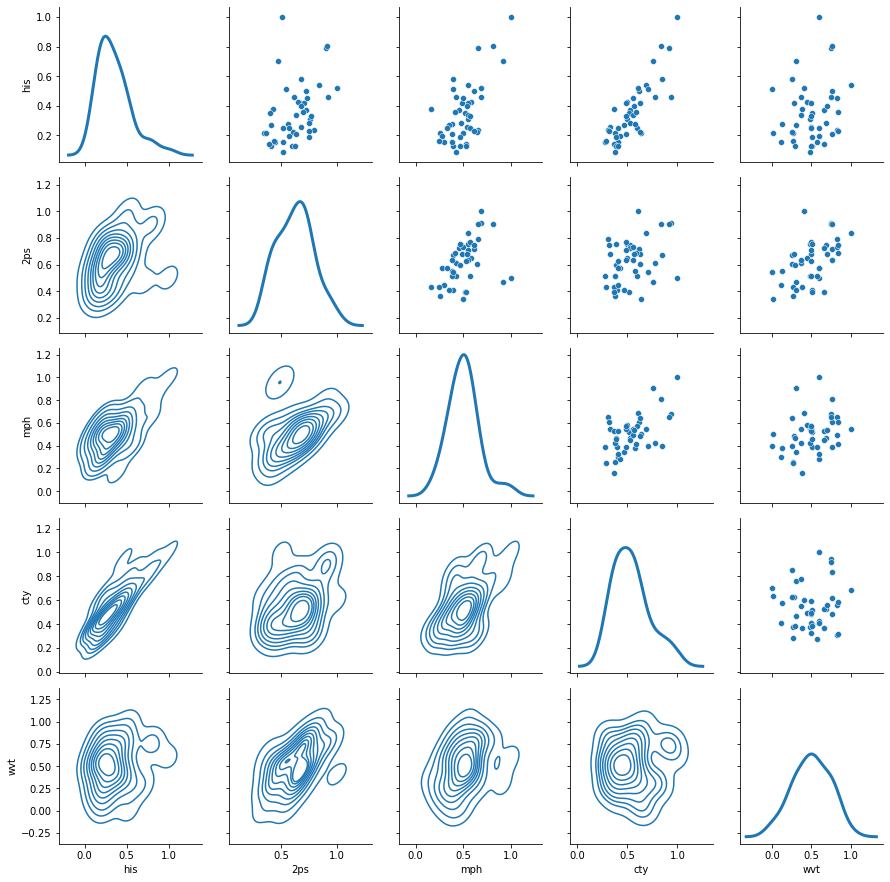

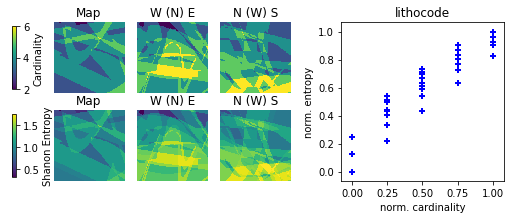

15-Jun-2021 (11:50:29) - LITHOCODE UNCERTAINTY VOXETS COMPARISON END


In [5]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"LITHOCODE DISSIMILARITY COMPARISON START")
# divide by maximum distance for normalization between [0-1]
dist_hist = dist_hist_mod/np.amax(dist_hist_mod)
dist_mph = dist_mph_mod/np.amax(dist_mph_mod)
dist_2ps = dist_2ps_mod/np.amax(dist_2ps_mod)
dist_cty = dist_cty_mod/np.amax(dist_cty_mod)
dist_wvt = dist_wvt_mod/np.amax(dist_wvt_mod)
title_spec = 'lithocode'
plot_comparison_dissimilarities(dist_hist,dist_2ps,dist_mph,dist_cty,dist_wvt,title_spec)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"LITHOCODE DISSIMILARITY COMPARISON END")

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"LITHOCODE UNCERTAINTY VOXETS COMPARISON START")
entropy = ent
lgd_ent = 'Shanon Entropy'
cardinality = crd
lgd_card = 'Cardinality'
plot_uncertainty_voxets(cardinality,entropy,lgd_card,lgd_ent,title_spec)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"LITHOCODE UNCERTAINTY VOXETS COMPARISON END")

# Density plots

15-Jun-2021 (11:50:29) - DENSITY DISSIMILARITY COMPARISON START


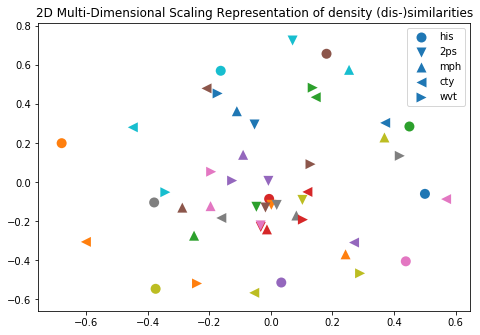

15-Jun-2021 (11:50:32) - DENSITY DISSIMILARITY COMPARISON END
15-Jun-2021 (11:50:32) - DENSITY UNCERTAINTY VOXETS COMPARISON START


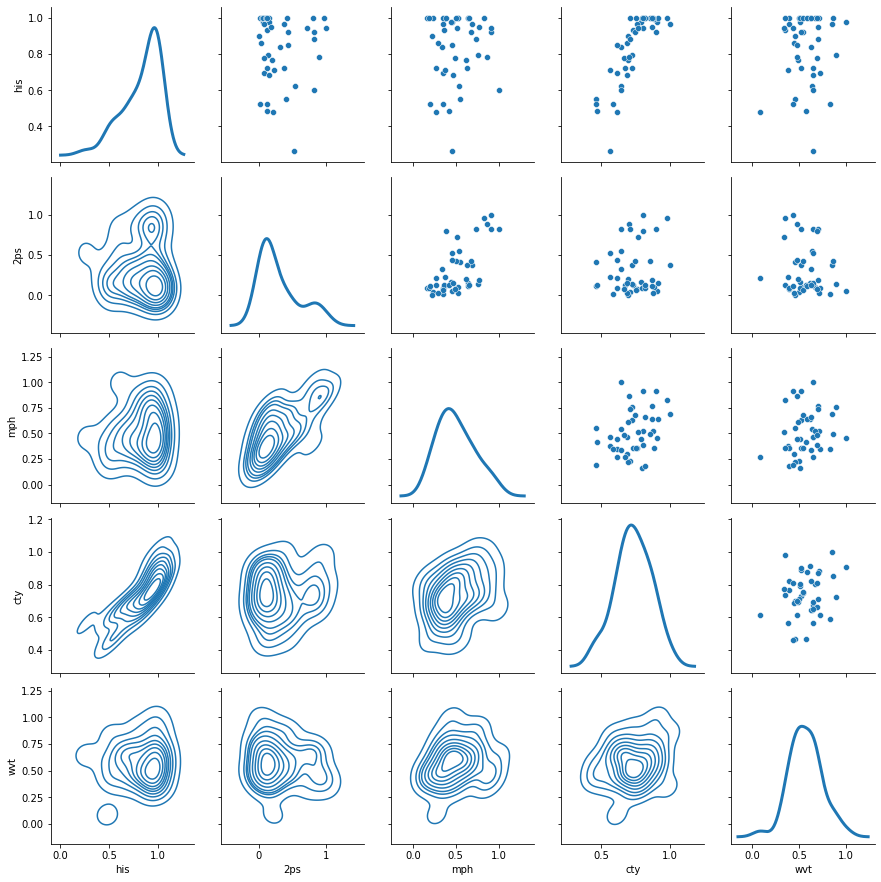

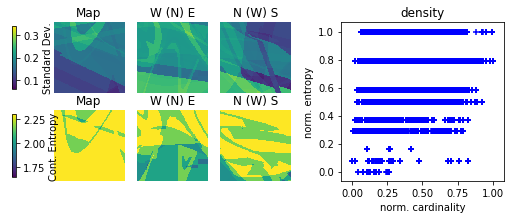

15-Jun-2021 (11:50:59) - DENSITY UNCERTAINTY VOXETS COMPARISON END


In [6]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"DENSITY DISSIMILARITY COMPARISON START")
# divide by maximum distance for normalization between [0-1]
dist_hist = dist_hist_rho/np.amax(dist_hist_rho)
dist_mph = dist_mph_rho/np.amax(dist_mph_rho)
dist_2ps = dist_2ps_rho/np.amax(dist_2ps_rho)
dist_cty = dist_cty_rho/np.amax(dist_cty_rho)
dist_wvt = dist_wvt_rho/np.amax(dist_wvt_rho)
title_spec = 'density'
plot_comparison_dissimilarities(dist_hist,dist_2ps,dist_mph,dist_cty,dist_wvt,title_spec)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"DENSITY DISSIMILARITY COMPARISON END")

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"DENSITY UNCERTAINTY VOXETS COMPARISON START")
entropy = ent_rho
lgd_ent = 'Cont. Entropy'
cardinality = rho_std
lgd_card = 'Standard Dev.'
plot_uncertainty_voxets(cardinality,entropy,lgd_card,lgd_ent,title_spec)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"DENSITY UNCERTAINTY VOXETS COMPARISON END")

# Magnetic susceptibility plots

15-Jun-2021 (11:50:59) - MAG. SUSC. DISSIMILARITY COMPARISON START


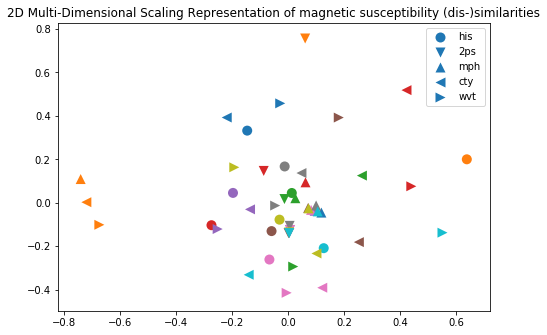

15-Jun-2021 (11:51:03) - MAG. SUSC. DISSIMILARITY COMPARISON END
15-Jun-2021 (11:51:03) - MAG. SUSC. UNCERTAINTY VOXETS COMPARISON START


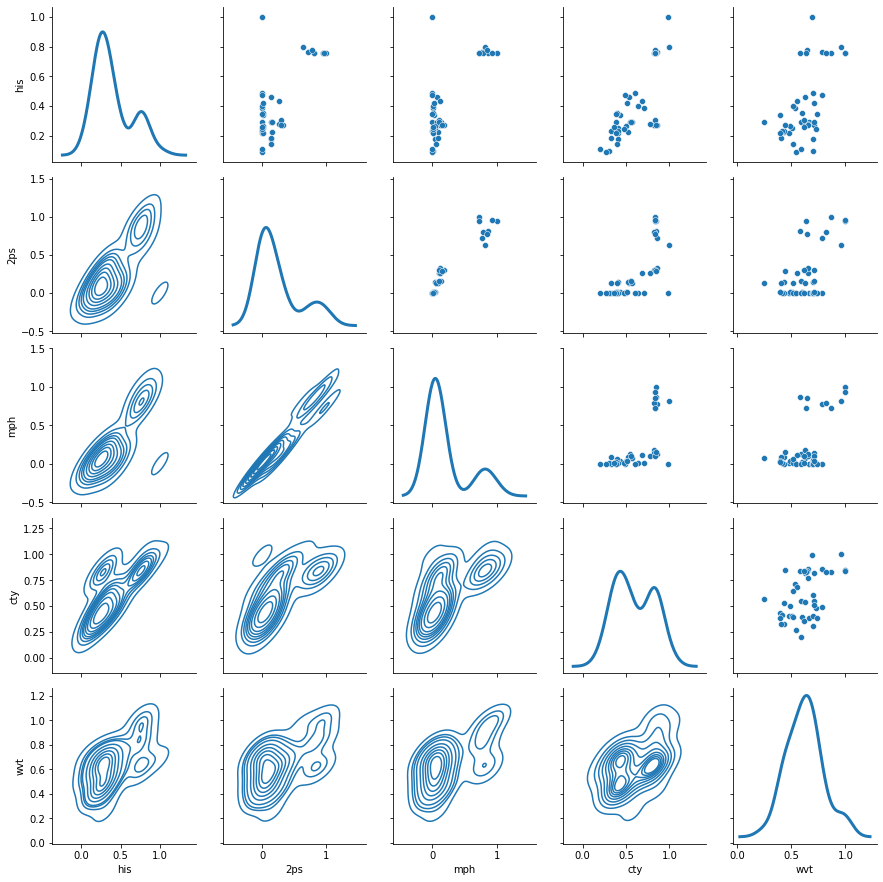

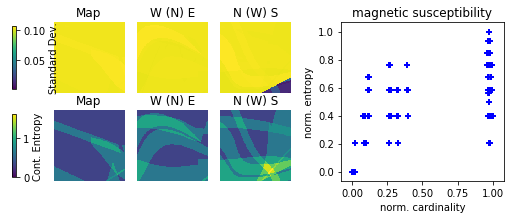

15-Jun-2021 (11:51:26) - MAG. SUSC. UNCERTAINTY VOXETS COMPARISON END


In [7]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"MAG. SUSC. DISSIMILARITY COMPARISON START")
# divide by maximum distance for normalization between [0-1]
dist_hist = dist_hist_sus/np.amax(dist_hist_sus)
dist_mph = dist_mph_sus/np.amax(dist_mph_sus)
dist_2ps = dist_2ps_sus/np.amax(dist_2ps_sus)
dist_cty = dist_cty_sus/np.amax(dist_cty_sus)
dist_wvt = dist_wvt_sus/np.amax(dist_wvt_sus)
title_spec = 'magnetic susceptibility'
plot_comparison_dissimilarities(dist_hist,dist_2ps,dist_mph,dist_cty,dist_wvt,title_spec)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"MAG. SUSC. DISSIMILARITY COMPARISON END")

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"MAG. SUSC. UNCERTAINTY VOXETS COMPARISON START")
entropy = ent_sus
lgd_ent = 'Cont. Entropy'
cardinality = sus_std
lgd_card = 'Standard Dev.'
plot_uncertainty_voxets(cardinality,entropy,lgd_card,lgd_ent,title_spec)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"MAG. SUSC. UNCERTAINTY VOXETS COMPARISON END")